In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Make participant list

In [2]:
# Define a list of common surname prefixes
surname_prefixes = ['van', 'van der', 'de', 'le', 'la', 'van de', 'Van', 'Van der', 'Van Der', 'Van De', 'De']
# Specify the path to your data file and the columns you want to keep
file_path = 'LILAC Participants - Form Responses 1.csv'
columns_to_keep = ['First and last name',
                   'Affiliation',
                   'For virtual attendees: what time zone will you be joining from?', 'Which Collaboration(s) are you part of?']

# Function to transform time zone information into attendance type
def transform_attendance(column):
    """
    Transforms time zone information into attendance type ('Virtual' or 'In Person').

    Parameters:
    - column: The pandas Series (column) with time zone or blank values.

    Returns:
    - Transformed pandas Series with 'Virtual' for non-blank entries and 'In Person' for blank entries.
    """
    return column.apply(lambda x: 'Virtual' if pd.notnull(x) and x.strip() != '' else 'In Person')

def extract_surname(name):
    """
    Extracts the surname from a full name, correctly handling known surname prefixes.
    """
    parts = name.split()
    # Reverse the name parts to start checking from the end
    parts.reverse()
    surname_parts = [parts[0]]  # Start with the last part of the name

    # Check if the preceding part is a known prefix and add it to the surname if so
    for part in parts[1:]:
        if part.lower() in surname_prefixes:
            surname_parts.append(part)
        else:
            break  # Stop if a part is not a known prefix

    # Return the surname, which is the last name part and any prefixes, reversed back to the correct order
    return ' '.join(reversed(surname_parts))

# Read the data file
df = pd.read_csv(file_path, usecols=columns_to_keep)

# Apply the transformation function and adjust column names
df['Attendance'] = transform_attendance(df['For virtual attendees: what time zone will you be joining from?'])
df.drop(columns=['For virtual attendees: what time zone will you be joining from?'], inplace=True)
df.rename(columns={'First and last name': 'Participant'}, inplace=True)

# Use the extract_surname function to get the surname for sorting
df['Surname'] = df['Participant'].apply(extract_surname)

# Sort the DataFrame by the surname
df.sort_values(by='Surname', inplace=True)

# Add a numbering column, starting from 1, after sorting
df.reset_index(drop=True, inplace=True)
df.index = df.index + 1
df['No.'] = df.index

# Reorder and select the final columns for display, dropping the 'Surname' column used for sorting
df = df[['No.', 'Participant', 'Affiliation', 'Attendance']]

# Convert the DataFrame to an HTML table
html_table = df.to_html(index=False, border=0, classes='participants-table', escape=False)

# Build the HTML content for your participants page with the table
html_content = f"""---
layout: default
title: Participants
order: 5
---
{html_table}
"""

# Print the HTML content to the console or write it to an HTML file
print(html_content)


---
layout: default
title: Participants
order: 5
---
<table border="0" class="dataframe participants-table">
  <thead>
    <tr style="text-align: right;">
      <th>No.</th>
      <th>Participant</th>
      <th>Affiliation</th>
      <th>Attendance</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>Alexandra Amon</td>
      <td>Princeton</td>
      <td>In Person</td>
    </tr>
    <tr>
      <td>2</td>
      <td>Raul Angulo</td>
      <td>DIPC</td>
      <td>Virtual</td>
    </tr>
    <tr>
      <td>3</td>
      <td>Marika Asgari</td>
      <td>Newcastle University</td>
      <td>Virtual</td>
    </tr>
    <tr>
      <td>4</td>
      <td>Thomas Bakx</td>
      <td>Utrecht University</td>
      <td>In Person</td>
    </tr>
    <tr>
      <td>5</td>
      <td>Avijit Bera</td>
      <td>The University of Texas at Dallas</td>
      <td>In Person</td>
    </tr>
    <tr>
      <td>6</td>
      <td>Jonathan Blazek</td>
      <td>Northeastern</td>
      <td>In Person</td>


Make histogram of collaborations

In [3]:
# Read the data file
df = pd.read_csv(file_path, usecols=columns_to_keep)
collaboration_list = [str(i).split(',') for i in df['Which Collaboration(s) are you part of?']]
# combine all the lists into one list
collaboration_list = [item.strip() for sublist in collaboration_list for item in sublist]

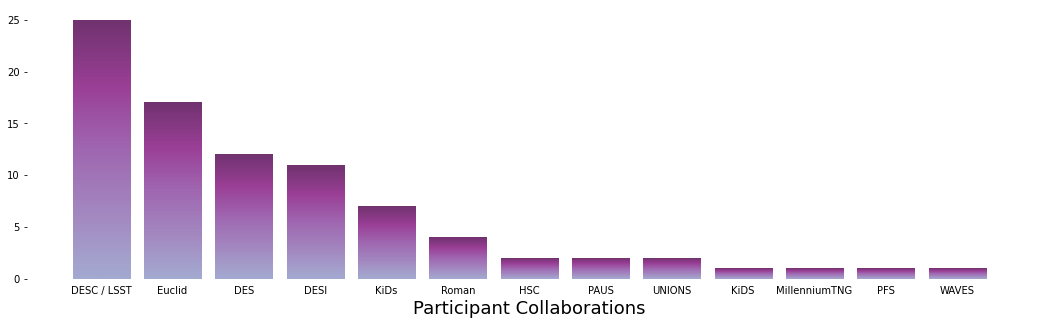

In [4]:
fig = plt.figure(figsize=(18, 5))
# sort histogram by frequency
collaboration_list.sort()
# remove nan
collaboration_list = [x for x in collaboration_list if str(x) != 'nan']

# make bar plot
bar = plt.bar(*zip(*dict(pd.Series(collaboration_list).value_counts()).items()))
# make each bar color a gradient of blues and purples
def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256)).T
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor("none")
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x,x+w,y,y+h], aspect="auto", zorder=0, cmap='BuPu_r', vmin=0, vmax=2, alpha=.8)
    ax.axis(lim)
gradientbars(bar)

plt.xlabel('Participant Collaborations', fontsize=18)

# hide axis lines
plt.box(False)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

# save
plt.savefig('assets/images/collaborations_bar.jpg', bbox_inches='tight', dpi=300)

Update html file

In [5]:
# update html content
# Build the HTML content for your participants page with the table
html_content = f"""---
layout: default
title: Participants
order: 5
---

<p align="center">
  <img src="assets/images/collaborations_bar.jpg" alt="Participant Collaborations" width="1000">
</p>
<br>
<br>

{html_table}
"""

# Print the HTML content to the console or write it to an HTML file
print(html_content)

---
layout: default
title: Participants
order: 5
---

<p align="center">
  <img src="assets/images/collaborations_bar.jpg" alt="Participant Collaborations" width="1000">
</p>
<br>
<br>

<table border="0" class="dataframe participants-table">
  <thead>
    <tr style="text-align: right;">
      <th>No.</th>
      <th>Participant</th>
      <th>Affiliation</th>
      <th>Attendance</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>Alexandra Amon</td>
      <td>Princeton</td>
      <td>In Person</td>
    </tr>
    <tr>
      <td>2</td>
      <td>Raul Angulo</td>
      <td>DIPC</td>
      <td>Virtual</td>
    </tr>
    <tr>
      <td>3</td>
      <td>Marika Asgari</td>
      <td>Newcastle University</td>
      <td>Virtual</td>
    </tr>
    <tr>
      <td>4</td>
      <td>Thomas Bakx</td>
      <td>Utrecht University</td>
      <td>In Person</td>
    </tr>
    <tr>
      <td>5</td>
      <td>Avijit Bera</td>
      <td>The University of Texas at Dallas</td>
      <td>In